<h1> How can Artiﬁcial Intelligence and Data Science Algorithms Predict Life Expectancy - An Empirical Investigation Spanning 193 Countries</h1>

<a href="https://www.kaggle.com/kumarajarshi/life-expectancy-who">Data Source Here</a>

<a href="https://www.sciencedirect.com/science/article/pii/S2667096823000150">Research Paper Here</a>

<h3>Importing Necessary Libraries</h3>

In [326]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import pingouin as pg
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

<h3>Load data</h3>

In [327]:
data = pd.read_csv ("Life Expectancy Data.csv")
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [328]:
# data overview 
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


<h3>Data Preprocessing</h3>

In [329]:
data = data.dropna(how = 'any')
data.drop(['Year', 'infant deaths', ' thinness 5-9 years'], axis=1, inplace=True)
data

,Country,Status,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Income composition of resources,Schooling
0,Afghanistan,Developing,65.0,263.0,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,0.479,10.1
1,Afghanistan,Developing,59.9,271.0,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,0.476,10.0
2,Afghanistan,Developing,59.9,268.0,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,0.470,9.9
3,Afghanistan,Developing,59.5,272.0,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,0.463,9.8
4,Afghanistan,Developing,59.2,275.0,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,Developing,44.3,723.0,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,0.407,9.2
2934,Zimbabwe,Developing,44.5,715.0,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,0.418,9.5
2935,Zimbabwe,Developing,44.8,73.0,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,0.427,10.0
2936,Zimbabwe,Developing,45.3,686.0,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,0.427,9.8


<h3>Factors Affecting Life Expectancy - Spearman Correlation Analysis</h3>

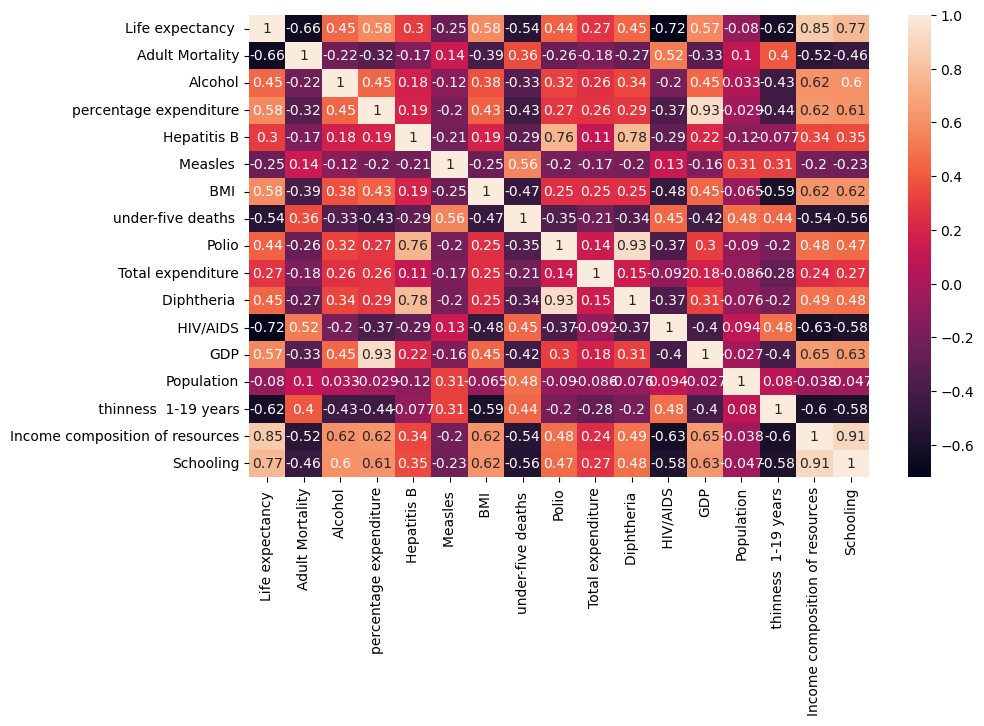

In [330]:
plt.figure(figsize = (10, 6))
sn.heatmap(data.corr(method = 'spearman'), annot = True)
plt.show()

Key Factors That Positively and Negatively Affect Life Expectancy From The Most To The Least
* Income Composition of Resources (Positively)
* Schooling (Positively)
* HIV/AIDS (Negatively)
* Adult Mortality (Negatively)
* Thinness 1-19 years (Negatively)
* BMI (Positively)
* Percentage Expenditure (Positively)
* GDP (Positively)

<h3>Scattered Plots Visualisation For Positive Correlated Factors</h3>

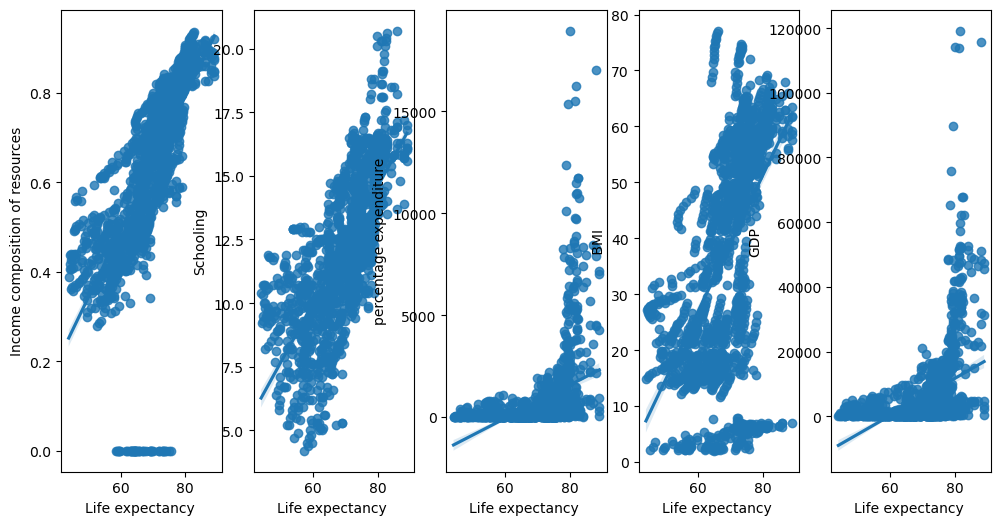

In [331]:
fig, (ax1, ax2, ax3, ax4, ax5)=plt.subplots(ncols=5, figsize=[12,6])
sn.regplot(data=data, x="Life expectancy ", y="Income composition of resources", ax=ax1).set_title("");
sn.regplot(data=data, x="Life expectancy ", y="Schooling", ax=ax2).set_title("");
sn.regplot(data=data, x="Life expectancy ", y="percentage expenditure", ax=ax3).set_title("");
sn.regplot(data=data, x="Life expectancy ", y=" BMI ", ax=ax4).set_title("");
sn.regplot(data=data, x="Life expectancy ", y="GDP", ax=ax5).set_title("");


<h3>Scattered Plots Visualisation For Negative Correlated Factors</h3> 

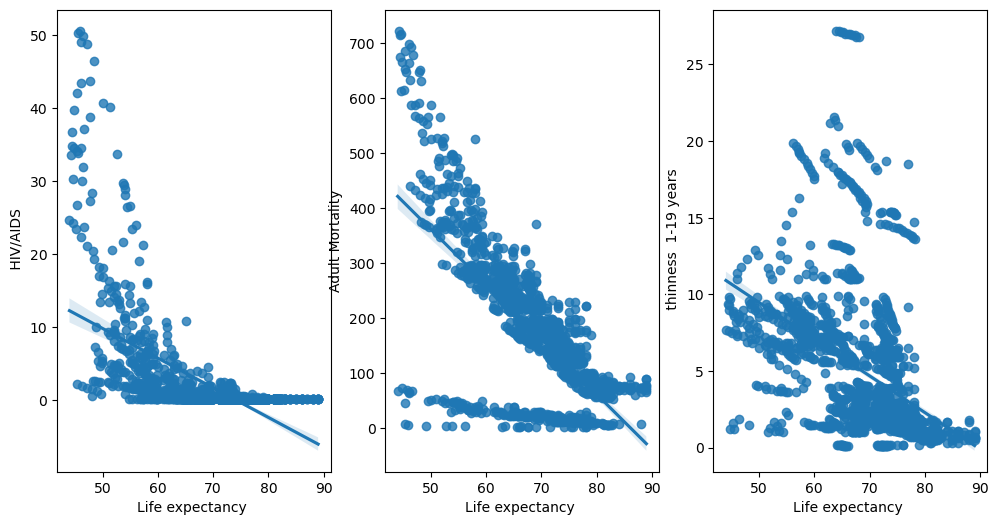

In [332]:
 fig, (ax1, ax2, ax3)=plt.subplots(ncols=3, figsize=[12,6])
sn.regplot(data=data, x="Life expectancy ", y=" HIV/AIDS", ax=ax1).set_title("");
sn.regplot(data=data, x="Life expectancy ", y="Adult Mortality", ax=ax2).set_title("");
sn.regplot(data=data, x="Life expectancy ", y=" thinness  1-19 years", ax=ax3).set_title("");


<h3>Correlation Analysis Taking Into Account CI95%, P-val and Power</h3>

In [333]:
pg.corr(data["Life expectancy "], data["Income composition of resources"],  method = 'spearman')

,n,r,CI95%,p-val,power
spearman,1649,0.849023,"[0.83, 0.86]",0.0,1.0


In [334]:
pg.corr(data["Life expectancy "], data["Schooling"],  method = 'spearman')

,n,r,CI95%,p-val,power
spearman,1649,0.774769,"[0.75, 0.79]",0.0,1.0


In [335]:
pg.corr(data["Life expectancy "], data[" HIV/AIDS"],  method = 'spearman')

,n,r,CI95%,p-val,power
spearman,1649,-0.720265,"[-0.74, -0.7]",6.996556e-264,1.0


In [336]:
pg.corr(data["Life expectancy "], data["Adult Mortality"],  method = 'spearman')

,n,r,CI95%,p-val,power
spearman,1649,-0.655621,"[-0.68, -0.63]",3.472943e-203,1.0


In [337]:
pg.corr(data["Life expectancy "], data[" thinness  1-19 years"],  method = 'spearman')

,n,r,CI95%,p-val,power
spearman,1649,-0.6196,"[-0.65, -0.59]",1.888048e-175,1.0


In [338]:
pg.corr(data["Life expectancy "], data[" BMI "],  method = 'spearman')

,n,r,CI95%,p-val,power
spearman,1649,0.583637,"[0.55, 0.61]",3.789242e-151,1.0


In [339]:
# Correlation Validation Tests
pg.corr(data["Life expectancy "], data["percentage expenditure"],  method = 'spearman')

,n,r,CI95%,p-val,power
spearman,1649,0.576686,"[0.54, 0.61]",8.544511e-147,1.0


In [340]:
pg.corr(data["Life expectancy "], data["GDP"],  method = 'spearman')

,n,r,CI95%,p-val,power
spearman,1649,0.570796,"[0.54, 0.6]",3.463623e-143,1.0


<h3>Country's Status and Life Expectancy</h3>

Life Expectancy Comparison between Developed and Developing Countries:

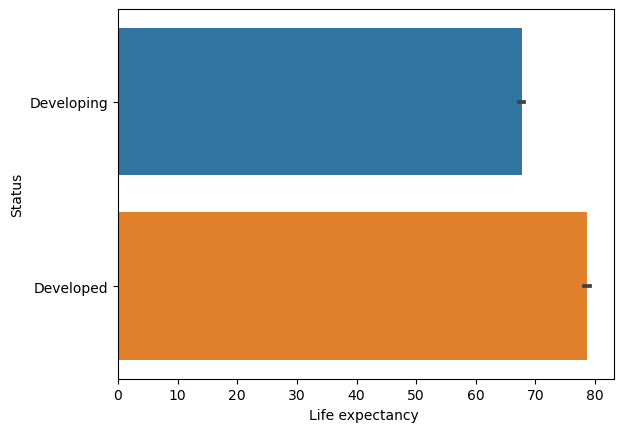

In [341]:
sn.barplot(data['Life expectancy '], data['Status'])
plt.show()

Using the world data average (WA) Life Expectancy threshold of 73 years for both male and female...


Data filtering to check how many developed and developing countries had Life Expectancy greater than the threshold between 2000 to 2015: 

In [342]:
# number of developed countries whose LE is greater than threshold

le_developed_above_wa = data[
    (data['Status'] == 'Developed') & 
    (data['Life expectancy '] > 73)
]
le_developed_countries_above_wa = le_developed_above_wa['Country'].unique()
le_developed_countries_above_wa.shape

(19,)

In [343]:
# number of developed countries whose LE is less than threshold

le_developed_below_wa = data[
    (data['Status'] == 'Developed') & 
    (data['Life expectancy '] < 73)
]
le_developed_countries_below_wa = le_developed_below_wa['Country'].unique()
le_developed_countries_below_wa.shape

(4,)

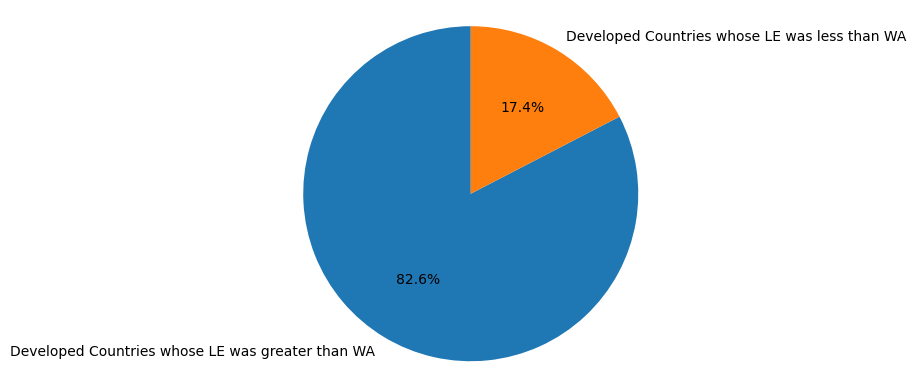

In [344]:
labels= ['Developed Countries whose LE was greater than WA', 'Developed Countries whose LE was less than WA']

sizes= [19, 4]

plt.pie(sizes,labels=labels, startangle=90, autopct='%1.1f%%')

plt.axis('equal')

plt.show()

In [345]:
# number of developing countries whose LE is greater than threshold

le_developing_above_wa = data[
    (data['Status'] == 'Developing') & 
    (data['Life expectancy '] > 73)
]
le_developing_countries_above_wa = le_developing_above_wa['Country'].unique()
le_developing_countries_above_wa.shape

(51,)

In [346]:
# number of developing countries whose LE is less than threshold

le_developing_below_wa = data[
    (data['Status'] == 'Developing') & 
    (data['Life expectancy '] < 73)
]
le_developing_countries_below_wa = le_developing_below_wa['Country'].unique()
le_developing_countries_below_wa.shape

(100,)

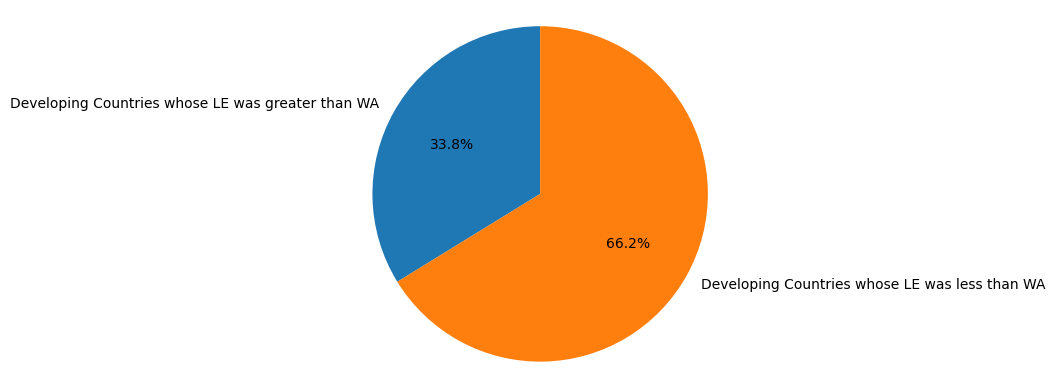

In [347]:
labels= ['Developing Countries whose LE was greater than WA', 'Developing Countries whose LE was less than WA']

sizes= [51, 100]

plt.pie(sizes,labels=labels, startangle=90, autopct='%1.1f%%')

plt.axis('equal')

plt.show()

<h3>Model building</h3>

In [348]:
# Creating a instance of label Encoder.
le = LabelEncoder()

# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(data['Status'])

# Appending the array to our dataFrame
# with column name 'Status'
data['Status'] = label

# printing label
label

array([1, 1, 1, ..., 1, 1, 1])

In [349]:
# feature selection
data = data[['Life expectancy ',' HIV/AIDS',' BMI ','Status','percentage expenditure','Income composition of resources','Schooling','GDP', ' thinness  1-19 years']]
data

,Life expectancy,HIV/AIDS,BMI,Status,percentage expenditure,Income composition of resources,Schooling,GDP,thinness 1-19 years
0,65.0,0.1,19.1,1,71.279624,0.479,10.1,584.259210,17.2
1,59.9,0.1,18.6,1,73.523582,0.476,10.0,612.696514,17.5
2,59.9,0.1,18.1,1,73.219243,0.470,9.9,631.744976,17.7
3,59.5,0.1,17.6,1,78.184215,0.463,9.8,669.959000,17.9
4,59.2,0.1,17.2,1,7.097109,0.454,9.5,63.537231,18.2
...,...,...,...,...,...,...,...,...,...
2933,44.3,33.6,27.1,1,0.000000,0.407,9.2,454.366654,9.4
2934,44.5,36.7,26.7,1,0.000000,0.418,9.5,453.351155,9.8
2935,44.8,39.8,26.3,1,0.000000,0.427,10.0,57.348340,1.2
2936,45.3,42.1,25.9,1,0.000000,0.427,9.8,548.587312,1.6


<h3>Importing ML Libraries</h3>

In [351]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

<h3>Model Training</h3>

In [352]:
model_data = data
X = data.drop(columns=['Life expectancy '])
y = data['Life expectancy ']

In [353]:
def train(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    model.fit(X_train, y_train)
    
    # predict the training set
    pred = model.predict(X_test)
    
    # perform 10 fold cross-validation
    cv_score = cross_val_score(model, X, y, scoring = 'neg_mean_squared_error', cv=10)
    cv_score = np.abs(np.mean(cv_score))
    
    # rmse
    rmse = sqrt(mean_squared_error(y_test, pred))
    
    # r-squared 
    rsquared = model.score(X_test, y_test)
    
    
    print('Model Report')
    print('MAE: ', mean_absolute_error(y_test, pred))
    print('MSE: ', mean_squared_error(y_test, pred))
    print('RMSE: ', rmse)
    print('R-SQUARED:', rsquared)
    print('CV Score:', cv_score)

<h3>Decision Tree Regression</h3>

In [354]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)

Model Report
MAE:  1.8739393939393942
MSE:  9.562
RMSE:  3.092248372948072
R-SQUARED: 0.8772721027858188
CV Score: 20.405453141167776


<h3>Random Forest Regression</h3>

In [355]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X, y)

Model Report
MAE:  1.4881363636363618
MSE:  4.827000348484838
RMSE:  2.1970435472436223
R-SQUARED: 0.9315606092187708
CV Score: 12.249676286385803


<h3>Extra (Extremely Randomized) Tree Regression</h3>

In [358]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, X, y)

Model Report
MAE:  1.3841333333333368
MSE:  4.411819612121217
RMSE:  2.1004331963005196
R-SQUARED: 0.9443414035501335
CV Score: 11.12592487993348


<h3>XGBoost</h3>

In [359]:
import xgboost as xgb
model = xgb.XGBRegressor()
train(model, X, y)

Model Report
MAE:  1.7212831023245148
MSE:  6.629914965234033
RMSE:  2.5748621254805144
R-SQUARED: 0.9142847923101448
CV Score: 13.97518697418831


*With the least MAE, MSE, RMSE, CV Score and the most R-Squared values, we conclude that the Extra Tree Regression model is the best for predicting Life Expectancy*